<a href="https://colab.research.google.com/github/Shokry1/Localization-and-Tracking/blob/main/Deep_learning_localization_assignment_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Objective
*   Know more about fingerprinting localization using Deep learning.
*   Learn how to compare the different systems.
*   Review Keras Deep learning framework using python programming.
*   Learn how to implement and evaluate Deep learning based systems.

# 2. Problem statement
>## Offline phase
The problem we are trying to solve here is finding user estimated location from a scan of the received signal strength (RSS) coming from the different APs in the environment using Deep learning-based fingerprinting techniques. The input to the problem is the fingerprint (which is collected in an offline calibration phase). The fingerprint is the RSS from the different APs in the environment geo-tagged with the location. The following code defines a fingerprint with 24 RSS samples with their fingerprinting locations *fingerprint_locs*. Each sample in the fingerprint consists of a scan of the RSS coming from the different APs (mainly four APs) and the groundtruth location (the true location). e.g the first sample has RSS scan from four APs: [-64., -73., -70., -85.] dBm and its true location is [11.74, 6.76] meter.


In [ ]:
'''
Fingerprint data
'''
fingerprint_rss = [[-64., -73., -70., -85.], \
                   [-57., -63., -81., -84.], \
                   [-54., -51., -75., -75.], \
                   [-45., -72., -90., -54.], \
                   [-69., -84., -100., -81.], \
                   [-55., -100., -66., -84.], \
                   [-54., -60., -69., -84.], \
                   [-39., -65., -78., -69.], \
                   [-84., -69., -69., -57.], \
                   [-65., -100., -100., -77.], \
                   [-69., -100., -87., -100.], \
                   [-63., -75., -90., -100.], \
                   [-84., -78., -84., -81.], \
                   [-70., -73., -85., -88.], \
                   [-61., -61., -91., -85.], \
                   [-79., -85., -67., -100.], \
                   [-87., -84., -78., -100.], \
                   [-78., -100., -66., -100.], \
                   [-87., -100., -39., -100.], \
                   [-67., -100., -100., -85.], \
                   [-70., -85., -100., -79.], \
                   [-69., -100., -100., -90.], \
                   [-100., -100., -82., -100.], \
                   [-83., -93., -77., -100.]]  # dBm

# location coordinates are in pixels to convert it to meters divide by 100 (first location is 11.74 in x direction and 6.76 in y direction) 

fingerprint_locs = [[1174, 676], \
                    [1586, 695], \
                    [2000, 670], \
                    [2376, 694], \
                    [2783, 998], \
                    [1256, 688], \
                    [1644, 674], \
                    [2043, 677], \
                    [2462, 678], \
                    [2860, 1083], \
                    [1149, 1406], \
                    [2157, 1103], \
                    [1744, 1128], \
                    [1206, 359], \
                    [1764, 350], \
                    [500, 252], \
                    [800, 247], \
                    [704, 659], \
                    [247, 650], \
                    [2197, 252], \
                    [2675, 347], \
                    [3146, 309], \
                    [826, 1169], \
                    [413, 1160]]

 
>It is required to use the previous fingerprint to train a simple Classifier neural network. The input to the network is the RSS coming from different cell towers in the environment (features) or in other works the RSS vector from the fingerprint. The output is the probability distribution for different fingerprint locations in the area of interest. The following figure explains the network structure. The input is the RSS vector from M access points (in our case M=4). The output is the probability of the different K locations in the fingerprint (in our case K=24). 

>>>>>>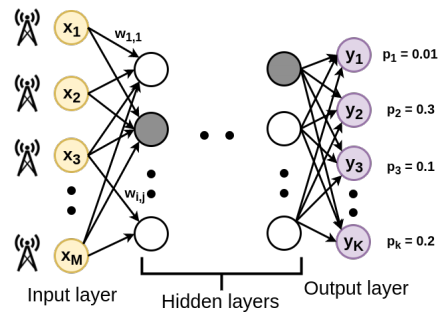

> In the offline phase, you are required to train the deep learning model using the fingerprinting samples. The data provided to the model is X,Y. The X is the RSS matrix for the (M access point * K samples). The Y is the one-hot encoding vectors for the ground truth locations. E.g. If you have K discrete locations in the fingerprint and the ground truth for a sample is the first location of the K, then the one-hot encoding vector corresponds to this sample is $[1,0,0,...,0]$. It means that the probability of the first location is 1, while the probability of the other K-1 locations is 0.   

> To train the deep model you need:

1.   Install the important frameworks.

In [ ]:
# Excute this cell only once.
# !pip install -qq tensorflow-gpu keras tqdm

2.   Import the Keras packages 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv1D, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam, SGD
import keras.backend as K
import numpy as np

3.   Define your model 

In [ ]:
# Defines the model to be trained
# The model F256->ReLU->F128->ReLU->F64->ReLU->F Output->Softmax       F means full dense layer
# You might want to add some Dropout layers as follows model.add(Dropout(0.5))


4.   Train your model 

In [ ]:
# Defines the parameters used and trains the model epochs = 10, batch size = 2, learning rate = 0.0001, loss is categorical_crossentropy, optimizer is Adam.




>## Online phase
In the online tracking phase, a user stands at unknown location hears RSS vector from the different APs in the environment. Your algorithm feed the RSS vector to the network to get the probability distribution for the different locations. Then you can select the location that has the highest probability as the estimated location. 

The test data is defined as follows,

In [ ]:
'''
Test data
'''
test_rss = [[-55., -66., -67., -85.], \
            [-60., -63., -81., -72.], \
            [-34., -100., -90., -78.], \
            [-45., -69., -81., -60.], \
            [-84., -100., -100., -84.], \
            [-51., -60., -69., -78.], \
            [-50., -74., -78., -75.], \
            [-39., -63., -75., -78.], \
            [-42., -68., -69., -72.], \
            [-72., -100., -100., -84.], \
            [-72., -78., -90., -84.], \
            [-66., -81., -100., -72.], \
            [-69., -65., -84., -87.], \
            [-61., -79., -90., -81.], \
            [-60., -63., -81., -84.], \
            [-75., -84., -81., -100.], \
            [-81., -100., -81., -100.], \
            [-78., -100., -66., -100.], \
            [-90., -100., -54., -100.], \
            [-51., -72., -100., -81.], \
            [-73., -100., -100., -82.], \
            [-78., -87., -100., -90.], \
            [-75., -87., -81., -100.], \
            [-80., -91., -62., -100.]] # dBm


test_locs = [[1380, 677], \
             [1786, 666], \
             [2176, 675], \
             [2572, 666], \
             [2780, 1186], \
             [1461, 687], \
             [1855, 681], \
             [2266, 689], \
             [2662, 690], \
             [2856, 1299], \
             [1738, 1419], \
             [2351, 917], \
             [1366, 1003], \
             [1418, 346], \
             [1950, 348], \
             [807, 441], \
             [482, 447], \
             [694, 956], \
             [258, 831], \
             [2407, 260], \
             [2964, 362], \
             [3465, 301], \
             [822, 1471], \
             [611, 1268]] # location coordinates are in pixels to comvert it to meters divide by 100 


The final step is to use the test data (test_rss, test_locs) to test and validate your model. 

In [ ]:
 # get the probability distribution for each row in the test_rss.
 # get the estimated location ID as a location that has the highet probability for each row in test_rss
 # calculate the error

# 3. Requirements
It is required to implement the following,
*   The Deep learning-based localization system using a classifier with the described parameters.
*   Draw the Cumulative distribution function (CDF) for the distance error using the proposed test data .
*   Compare the CDF for the deep learning-based system with RADAR using Euclidean distance.
*   Draw a figure that shows the effect of changing the learnng rate (lr= $10^{-1}$, $10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$) on the median localization error.
*   Draw a figure that shows the effect of changing number of epochs on the median localization error.

# 4. Bonus


*   Try different deep learning models for localization. 


# 5. Possible resources


*   [DeepLoc paper Section 3.1.3](https://www.academia.edu/download/61164055/DeepLocSMM20191108-93295-21bjio.pdf)
*   [Logistic classifier](https://youtu.be/G8eNWzxOgqE)
*   [Classifier implementation](https://victorzhou.com/blog/keras-neural-network-tutorial/)

# 6. Final notes

*   It is reuired to deliver the notebook with the Deep learning implementation, the CDFs and the error statistics (mean and median).
*   Assignment delivery date is on Thursday **April 22**.







